### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [9]:
cust_df['var3'] # cust_df['ID'] keyerror

0        2
1        2
2        2
3        2
4        2
        ..
76015    2
76016    2
76017    2
76018    2
76019    2
Name: var3, Length: 76020, dtype: int64

In [10]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
#cust_df.drop('ID',axis=1 , inplace=True)  # ID keyerror

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
X_features = cust_df.iloc[:,1:]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

#xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict(X_test), average='macro')
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



[0]	validation_0-auc:1	validation_1-auc:1
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:1	validation_1-auc:1
[2]	validation_0-auc:1	validation_1-auc:1
[3]	validation_0-auc:1	validation_1-auc:1
[4]	validation_0-auc:1	validation_1-auc:1
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-auc:1	validation_1-auc:1
[18]	validation_0-auc:1	validation_1-auc:1
[19]	validation_0-auc:1	validation_

In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-auc:0.808842	validation_1-auc:0.80834
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:1	validation_1-auc:1
[2]	validation_0-auc:0.999975	validation_1-auc:0.999997
[3]	validation_0-auc:0.999908	validation_1-auc:0.999861
[4]	validation_0-auc:0.999866	validation_1-auc:0.999771
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:0.999982	validation_1-auc:1
[7]	validation_0-auc:0.99997	validation_1-auc:0.999958
[8]	validation_0-auc:0.999963	validation_1-auc:0.999935
[9]	validation_0-auc:0.999992	validation_1-auc:1
[10]	validation_0-auc:0.999987	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-a

[30]	validation_0-auc:1	validation_1-auc:1
[31]	validation_0-auc:1	validation_1-auc:1
Stopping. Best iteration:
[1]	validation_0-auc:1	validation_1-auc:1

[0]	validation_0-auc:0.815751	validation_1-auc:0.820516
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:1	validation_1-auc:1
[2]	validation_0-auc:1	validation_1-auc:1
[3]	validation_0-auc:0.999937	validation_1-auc:0.999827
[4]	validation_0-auc:0.99988	validation_1-auc:0.999679
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:0.999987	validation_1-auc:0.999949
[8]	validation_0-auc:0.999982	validation_1-auc:0.999941
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	val

[23]	validation_0-auc:1	validation_1-auc:1
[24]	validation_0-auc:1	validation_1-auc:1
[25]	validation_0-auc:1	validation_1-auc:1
[26]	validation_0-auc:1	validation_1-auc:1
[27]	validation_0-auc:1	validation_1-auc:1
[28]	validation_0-auc:1	validation_1-auc:1
[29]	validation_0-auc:1	validation_1-auc:1
[30]	validation_0-auc:1	validation_1-auc:1
[31]	validation_0-auc:1	validation_1-auc:1
Stopping. Best iteration:
[1]	validation_0-auc:1	validation_1-auc:1

[0]	validation_0-auc:0.811572	validation_1-auc:0.806051
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:1	validation_1-auc:1
[2]	validation_0-auc:0.999975	validation_1-auc:0.999983
[3]	validation_0-auc:0.999825	validation_1-auc:0.999715
[4]	validation_0-auc:0.999688	validation_1-auc:0.999641
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:0.999995	validation_1-auc:1
[7]	validation_0-auc:0.99999	v

[26]	validation_0-auc:1	validation_1-auc:1
[27]	validation_0-auc:1	validation_1-auc:1
[28]	validation_0-auc:1	validation_1-auc:1
[29]	validation_0-auc:1	validation_1-auc:1
[30]	validation_0-auc:1	validation_1-auc:1
Stopping. Best iteration:
[0]	validation_0-auc:1	validation_1-auc:1

[0]	validation_0-auc:1	validation_1-auc:1
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:1	validation_1-auc:1
[2]	validation_0-auc:1	validation_1-auc:1
[3]	validation_0-auc:1	validation_1-auc:1
[4]	validation_0-auc:1	validation_1-auc:1
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	valid

[1]	validation_0-auc:1	validation_1-auc:1
[2]	validation_0-auc:1	validation_1-auc:1
[3]	validation_0-auc:1	validation_1-auc:1
[4]	validation_0-auc:1	validation_1-auc:1
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-auc:1	validation_1-auc:1
[18]	validation_0-auc:1	validation_1-auc:1
[19]	validation_0-auc:1	validation_1-auc:1
[20]	validation_0-auc:1	validation_1-auc:1
[21]	validation_0-auc:1	validation_1-auc:1
[22]	validation_0-auc:1	validation_1-auc:1
[23]	validation_0-auc:1	validation_1-auc:1
[24]	validation_0-au

In [10]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.743236	validation_1-auc:0.744766
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.81189	validation_1-auc:0.803215
[2]	validation_0-auc:0.824799	validation_1-auc:0.817951
[3]	validation_0-auc:0.826695	validation_1-auc:0.820419
[4]	validation_0-auc:0.829597	validation_1-auc:0.821631
[5]	validation_0-auc:0.829853	validation_1-auc:0.822031
[6]	validation_0-auc:0.828231	validation_1-auc:0.820253
[7]	validation_0-auc:0.827583	validation_1-auc:0.821072
[8]	validation_0-auc:0.824592	validation_1-auc:0.819858
[9]	validation_0-auc:0.821731	validation_1-auc:0.817583
[10]	validation_0-auc:0.824526	validation_1-auc:0.819256
[11]	validation_0-auc:0.826389	validation_1-auc:0.820675
[12]	validation_0-auc:0.826963	validation_1-auc:0.821252
[13]	validation_0-auc:0.825793	validation_1-auc:0.820239
[14]	validation_0-auc:0.829752	validation_1-auc:0.82451

[141]	validation_0-auc:0.855981	validation_1-auc:0.841153
[142]	validation_0-auc:0.856109	validation_1-auc:0.841266
[143]	validation_0-auc:0.856269	validation_1-auc:0.841419
[144]	validation_0-auc:0.856345	validation_1-auc:0.84164
[145]	validation_0-auc:0.856443	validation_1-auc:0.841742
[146]	validation_0-auc:0.856544	validation_1-auc:0.84182
[147]	validation_0-auc:0.856535	validation_1-auc:0.842001
[148]	validation_0-auc:0.856564	validation_1-auc:0.841925
[149]	validation_0-auc:0.856661	validation_1-auc:0.842104
[150]	validation_0-auc:0.856796	validation_1-auc:0.842245
[151]	validation_0-auc:0.857013	validation_1-auc:0.842387
[152]	validation_0-auc:0.857154	validation_1-auc:0.842485
[153]	validation_0-auc:0.857177	validation_1-auc:0.842525
[154]	validation_0-auc:0.857397	validation_1-auc:0.842623
[155]	validation_0-auc:0.857464	validation_1-auc:0.84272
[156]	validation_0-auc:0.857495	validation_1-auc:0.842823
[157]	validation_0-auc:0.85761	validation_1-auc:0.842804
[158]	validation_0

[283]	validation_0-auc:0.872332	validation_1-auc:0.843464
[284]	validation_0-auc:0.872466	validation_1-auc:0.843435
[285]	validation_0-auc:0.872579	validation_1-auc:0.843334
[286]	validation_0-auc:0.872698	validation_1-auc:0.843298
[287]	validation_0-auc:0.872788	validation_1-auc:0.843274
[288]	validation_0-auc:0.872859	validation_1-auc:0.843307
[289]	validation_0-auc:0.872933	validation_1-auc:0.843336
[290]	validation_0-auc:0.873055	validation_1-auc:0.843296
[291]	validation_0-auc:0.873119	validation_1-auc:0.843253
[292]	validation_0-auc:0.873164	validation_1-auc:0.843256
[293]	validation_0-auc:0.873255	validation_1-auc:0.843148
[294]	validation_0-auc:0.873363	validation_1-auc:0.843156
[295]	validation_0-auc:0.87354	validation_1-auc:0.843242
[296]	validation_0-auc:0.873676	validation_1-auc:0.843231
[297]	validation_0-auc:0.873761	validation_1-auc:0.843249
[298]	validation_0-auc:0.873827	validation_1-auc:0.843304
[299]	validation_0-auc:0.873892	validation_1-auc:0.843358
[300]	validatio

XGBoostError: need to call fit or load_model beforehand

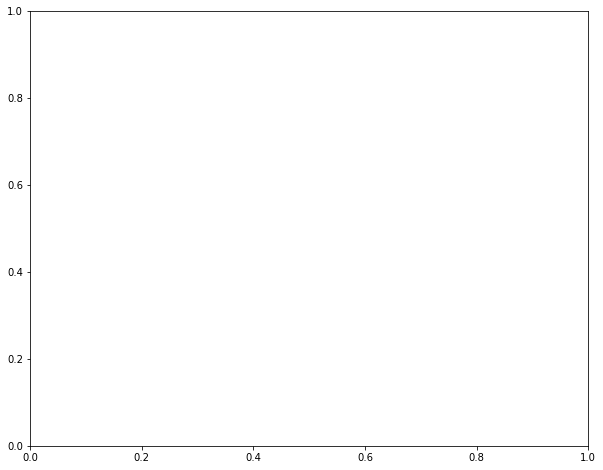

In [17]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [18]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0788474
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0679944
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.0593571
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0522233
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.0461965
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.041028
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0365483
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0326352
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.0291966
[10]	valid_0's auc: 1	valid_0's binary_logloss: 0.0261609
[11]	valid_0's auc: 1	valid_0's binary_logloss: 0.0234711
[12]	valid_0's auc: 1	valid_0's binary_logloss: 0.0210805
[13]	valid_0's auc: 1	valid_0's binary_logloss: 0.0189508
[14]	valid_0's auc: 1	valid_0's binary_logloss: 0.0170494
[15]	valid_0's auc: 1	valid_0's binary_logloss: 0.0153491
[16]	valid_0's auc: 1	valid_0's binary_logloss: 0.0138264
[17]	valid_0's auc: 

In [19]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0760779	valid_1's auc: 1	valid_1's binary_logloss: 0.078817
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657013	valid_1's auc: 1	valid_1's binary_logloss: 0.0679699
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.057419	valid_1's auc: 1	valid_1's binary_logloss: 0.0593366
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505627	valid_1's auc: 1	valid_1's binary_logloss: 0.0522057
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.04476	valid_1's auc: 1	valid_1's binary_logloss: 0.0461813
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397762	valid_1's auc: 1	valid_1's binary_logloss: 0.0410147
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354512	valid_1's auc: 1	valid_1's binary_logloss: 0.0365365
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316693	valid_1's auc: 1	valid_1's binary_logloss: 0.0326248
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.0283431	valid_

[19]	valid_0's auc: 1	valid_0's binary_logloss: 0.00986161	valid_1's auc: 1	valid_1's binary_logloss: 0.0101356
[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889891	valid_1's auc: 1	valid_1's binary_logloss: 0.00914528
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.0080325	valid_1's auc: 1	valid_1's binary_logloss: 0.00825418
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.0072523	valid_1's auc: 1	valid_1's binary_logloss: 0.00745187
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654936	valid_1's auc: 1	valid_1's binary_logloss: 0.00672913
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591574	valid_1's auc: 1	valid_1's binary_logloss: 0.00607774
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534437	valid_1's auc: 1	valid_1's binary_logloss: 0.00549043
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482896	valid_1's auc: 1	valid_1's binary_logloss: 0.00496069
[27]	valid_0's auc: 1	valid_0's binary_logloss: 0.00436388	valid_1's auc: 1	valid_1's binary_loglos

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0761211	valid_1's auc: 1	valid_1's binary_logloss: 0.0788617
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657362	valid_1's auc: 1	valid_1's binary_logloss: 0.0680059
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.0574483	valid_1's auc: 1	valid_1's binary_logloss: 0.0593668
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505879	valid_1's auc: 1	valid_1's binary_logloss: 0.0522315
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.0447818	valid_1's auc: 1	valid_1's binary_logloss: 0.0462037
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397954	valid_1's auc: 1	valid_1's binary_logloss: 0.0410343
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354681	valid_1's auc: 1	valid_1's binary_logloss: 0.0365538
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316843	valid_1's auc: 1	valid_1's binary_logloss: 0.03264
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.0283564	vali

[18]	valid_0's auc: 1	valid_0's binary_logloss: 0.0109323	valid_1's auc: 1	valid_1's binary_logloss: 0.0112372
[19]	valid_0's auc: 1	valid_0's binary_logloss: 0.00986181	valid_1's auc: 1	valid_1's binary_logloss: 0.0101358
[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889908	valid_1's auc: 1	valid_1's binary_logloss: 0.00914545
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.00803266	valid_1's auc: 1	valid_1's binary_logloss: 0.00825434
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.00725244	valid_1's auc: 1	valid_1's binary_logloss: 0.00745202
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654948	valid_1's auc: 1	valid_1's binary_logloss: 0.00672926
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591585	valid_1's auc: 1	valid_1's binary_logloss: 0.00607786
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534448	valid_1's auc: 1	valid_1's binary_logloss: 0.00549053
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482905	valid_1's auc: 1	valid_1's binary_loglos

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0761229	valid_1's auc: 1	valid_1's binary_logloss: 0.0788636
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657377	valid_1's auc: 1	valid_1's binary_logloss: 0.0680074
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.0574495	valid_1's auc: 1	valid_1's binary_logloss: 0.059368
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505889	valid_1's auc: 1	valid_1's binary_logloss: 0.0522326
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.0447828	valid_1's auc: 1	valid_1's binary_logloss: 0.0462046
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397962	valid_1's auc: 1	valid_1's binary_logloss: 0.0410351
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354689	valid_1's auc: 1	valid_1's binary_logloss: 0.0365546
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316849	valid_1's auc: 1	valid_1's binary_logloss: 0.0326407
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.028357	vali

[19]	valid_0's auc: 1	valid_0's binary_logloss: 0.0098571	valid_1's auc: 1	valid_1's binary_logloss: 0.010131
[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889484	valid_1's auc: 1	valid_1's binary_logloss: 0.00914114
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.00802884	valid_1's auc: 1	valid_1's binary_logloss: 0.00825045
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.00724899	valid_1's auc: 1	valid_1's binary_logloss: 0.00744851
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654637	valid_1's auc: 1	valid_1's binary_logloss: 0.00672609
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591304	valid_1's auc: 1	valid_1's binary_logloss: 0.006075
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534194	valid_1's auc: 1	valid_1's binary_logloss: 0.00548796
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482676	valid_1's auc: 1	valid_1's binary_logloss: 0.00495845
[27]	valid_0's auc: 1	valid_0's binary_logloss: 0.00436189	valid_1's auc: 1	valid_1's binary_logloss:

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0760779	valid_1's auc: 1	valid_1's binary_logloss: 0.078817
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657013	valid_1's auc: 1	valid_1's binary_logloss: 0.0679699
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.057419	valid_1's auc: 1	valid_1's binary_logloss: 0.0593366
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505627	valid_1's auc: 1	valid_1's binary_logloss: 0.0522057
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.04476	valid_1's auc: 1	valid_1's binary_logloss: 0.0461813
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397762	valid_1's auc: 1	valid_1's binary_logloss: 0.0410147
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354512	valid_1's auc: 1	valid_1's binary_logloss: 0.0365365
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316693	valid_1's auc: 1	valid_1's binary_logloss: 0.0326248
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.0283431	valid_

[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889891	valid_1's auc: 1	valid_1's binary_logloss: 0.00914528
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.0080325	valid_1's auc: 1	valid_1's binary_logloss: 0.00825418
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.0072523	valid_1's auc: 1	valid_1's binary_logloss: 0.00745187
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654936	valid_1's auc: 1	valid_1's binary_logloss: 0.00672913
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591574	valid_1's auc: 1	valid_1's binary_logloss: 0.00607774
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534437	valid_1's auc: 1	valid_1's binary_logloss: 0.00549043
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482896	valid_1's auc: 1	valid_1's binary_logloss: 0.00496069
[27]	valid_0's auc: 1	valid_0's binary_logloss: 0.00436388	valid_1's auc: 1	valid_1's binary_logloss: 0.00448272
[28]	valid_0's auc: 1	valid_0's binary_logloss: 0.00394409	valid_1's auc: 1	valid_1's binary_loglo

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0761211	valid_1's auc: 1	valid_1's binary_logloss: 0.0788617
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657362	valid_1's auc: 1	valid_1's binary_logloss: 0.0680059
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.0574483	valid_1's auc: 1	valid_1's binary_logloss: 0.0593668
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505879	valid_1's auc: 1	valid_1's binary_logloss: 0.0522315
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.0447818	valid_1's auc: 1	valid_1's binary_logloss: 0.0462037
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397954	valid_1's auc: 1	valid_1's binary_logloss: 0.0410343
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354681	valid_1's auc: 1	valid_1's binary_logloss: 0.0365538
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316843	valid_1's auc: 1	valid_1's binary_logloss: 0.03264
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.0283564	vali

[19]	valid_0's auc: 1	valid_0's binary_logloss: 0.00986181	valid_1's auc: 1	valid_1's binary_logloss: 0.0101358
[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889908	valid_1's auc: 1	valid_1's binary_logloss: 0.00914545
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.00803266	valid_1's auc: 1	valid_1's binary_logloss: 0.00825434
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.00725244	valid_1's auc: 1	valid_1's binary_logloss: 0.00745202
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654948	valid_1's auc: 1	valid_1's binary_logloss: 0.00672926
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591585	valid_1's auc: 1	valid_1's binary_logloss: 0.00607786
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534448	valid_1's auc: 1	valid_1's binary_logloss: 0.00549053
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482905	valid_1's auc: 1	valid_1's binary_logloss: 0.00496078
[27]	valid_0's auc: 1	valid_0's binary_logloss: 0.00436396	valid_1's auc: 1	valid_1's binary_logl

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0761229	valid_1's auc: 1	valid_1's binary_logloss: 0.0788636
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657377	valid_1's auc: 1	valid_1's binary_logloss: 0.0680074
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.0574495	valid_1's auc: 1	valid_1's binary_logloss: 0.059368
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505889	valid_1's auc: 1	valid_1's binary_logloss: 0.0522326
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.0447828	valid_1's auc: 1	valid_1's binary_logloss: 0.0462046
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397962	valid_1's auc: 1	valid_1's binary_logloss: 0.0410351
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354689	valid_1's auc: 1	valid_1's binary_logloss: 0.0365546
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316849	valid_1's auc: 1	valid_1's binary_logloss: 0.0326407
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.028357	vali

[19]	valid_0's auc: 1	valid_0's binary_logloss: 0.0098571	valid_1's auc: 1	valid_1's binary_logloss: 0.010131
[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889484	valid_1's auc: 1	valid_1's binary_logloss: 0.00914114
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.00802884	valid_1's auc: 1	valid_1's binary_logloss: 0.00825045
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.00724899	valid_1's auc: 1	valid_1's binary_logloss: 0.00744851
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654637	valid_1's auc: 1	valid_1's binary_logloss: 0.00672609
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591304	valid_1's auc: 1	valid_1's binary_logloss: 0.006075
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534194	valid_1's auc: 1	valid_1's binary_logloss: 0.00548796
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482676	valid_1's auc: 1	valid_1's binary_logloss: 0.00495845
[27]	valid_0's auc: 1	valid_0's binary_logloss: 0.00436189	valid_1's auc: 1	valid_1's binary_logloss:

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0760779	valid_1's auc: 1	valid_1's binary_logloss: 0.078817
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657013	valid_1's auc: 1	valid_1's binary_logloss: 0.0679699
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.057419	valid_1's auc: 1	valid_1's binary_logloss: 0.0593366
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505627	valid_1's auc: 1	valid_1's binary_logloss: 0.0522057
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.04476	valid_1's auc: 1	valid_1's binary_logloss: 0.0461813
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397762	valid_1's auc: 1	valid_1's binary_logloss: 0.0410147
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354512	valid_1's auc: 1	valid_1's binary_logloss: 0.0365365
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316693	valid_1's auc: 1	valid_1's binary_logloss: 0.0326248
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.0283431	valid_

[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889891	valid_1's auc: 1	valid_1's binary_logloss: 0.00914528
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.0080325	valid_1's auc: 1	valid_1's binary_logloss: 0.00825418
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.0072523	valid_1's auc: 1	valid_1's binary_logloss: 0.00745187
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654936	valid_1's auc: 1	valid_1's binary_logloss: 0.00672913
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591574	valid_1's auc: 1	valid_1's binary_logloss: 0.00607774
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534437	valid_1's auc: 1	valid_1's binary_logloss: 0.00549043
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482896	valid_1's auc: 1	valid_1's binary_logloss: 0.00496069
[27]	valid_0's auc: 1	valid_0's binary_logloss: 0.00436388	valid_1's auc: 1	valid_1's binary_logloss: 0.00448272
[28]	valid_0's auc: 1	valid_0's binary_logloss: 0.00394409	valid_1's auc: 1	valid_1's binary_loglo

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0761211	valid_1's auc: 1	valid_1's binary_logloss: 0.0788617
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657362	valid_1's auc: 1	valid_1's binary_logloss: 0.0680059
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.0574483	valid_1's auc: 1	valid_1's binary_logloss: 0.0593668
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505879	valid_1's auc: 1	valid_1's binary_logloss: 0.0522315
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.0447818	valid_1's auc: 1	valid_1's binary_logloss: 0.0462037
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397954	valid_1's auc: 1	valid_1's binary_logloss: 0.0410343
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354681	valid_1's auc: 1	valid_1's binary_logloss: 0.0365538
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316843	valid_1's auc: 1	valid_1's binary_logloss: 0.03264
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.0283564	vali

[19]	valid_0's auc: 1	valid_0's binary_logloss: 0.00986181	valid_1's auc: 1	valid_1's binary_logloss: 0.0101358
[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889908	valid_1's auc: 1	valid_1's binary_logloss: 0.00914545
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.00803266	valid_1's auc: 1	valid_1's binary_logloss: 0.00825434
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.00725244	valid_1's auc: 1	valid_1's binary_logloss: 0.00745202
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654948	valid_1's auc: 1	valid_1's binary_logloss: 0.00672926
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591585	valid_1's auc: 1	valid_1's binary_logloss: 0.00607786
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534448	valid_1's auc: 1	valid_1's binary_logloss: 0.00549053
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482905	valid_1's auc: 1	valid_1's binary_logloss: 0.00496078
[27]	valid_0's auc: 1	valid_0's binary_logloss: 0.00436396	valid_1's auc: 1	valid_1's binary_logl

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0761229	valid_1's auc: 1	valid_1's binary_logloss: 0.0788636
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657377	valid_1's auc: 1	valid_1's binary_logloss: 0.0680074
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.0574495	valid_1's auc: 1	valid_1's binary_logloss: 0.059368
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505889	valid_1's auc: 1	valid_1's binary_logloss: 0.0522326
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.0447828	valid_1's auc: 1	valid_1's binary_logloss: 0.0462046
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397962	valid_1's auc: 1	valid_1's binary_logloss: 0.0410351
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354689	valid_1's auc: 1	valid_1's binary_logloss: 0.0365546
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316849	valid_1's auc: 1	valid_1's binary_logloss: 0.0326407
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.028357	vali

[19]	valid_0's auc: 1	valid_0's binary_logloss: 0.0098571	valid_1's auc: 1	valid_1's binary_logloss: 0.010131
[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889484	valid_1's auc: 1	valid_1's binary_logloss: 0.00914114
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.00802884	valid_1's auc: 1	valid_1's binary_logloss: 0.00825045
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.00724899	valid_1's auc: 1	valid_1's binary_logloss: 0.00744851
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654637	valid_1's auc: 1	valid_1's binary_logloss: 0.00672609
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591304	valid_1's auc: 1	valid_1's binary_logloss: 0.006075
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534194	valid_1's auc: 1	valid_1's binary_logloss: 0.00548796
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482676	valid_1's auc: 1	valid_1's binary_logloss: 0.00495845
[27]	valid_0's auc: 1	valid_0's binary_logloss: 0.00436189	valid_1's auc: 1	valid_1's binary_logloss:

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0760779	valid_1's auc: 1	valid_1's binary_logloss: 0.078817
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0657013	valid_1's auc: 1	valid_1's binary_logloss: 0.0679699
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.057419	valid_1's auc: 1	valid_1's binary_logloss: 0.0593366
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0505627	valid_1's auc: 1	valid_1's binary_logloss: 0.0522057
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.04476	valid_1's auc: 1	valid_1's binary_logloss: 0.0461813
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.0397762	valid_1's auc: 1	valid_1's binary_logloss: 0.0410147
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0354512	valid_1's auc: 1	valid_1's binary_logloss: 0.0365365
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0316693	valid_1's auc: 1	valid_1's binary_logloss: 0.0326248
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.0283431	valid_

[20]	valid_0's auc: 1	valid_0's binary_logloss: 0.00889891	valid_1's auc: 1	valid_1's binary_logloss: 0.00914528
[21]	valid_0's auc: 1	valid_0's binary_logloss: 0.0080325	valid_1's auc: 1	valid_1's binary_logloss: 0.00825418
[22]	valid_0's auc: 1	valid_0's binary_logloss: 0.0072523	valid_1's auc: 1	valid_1's binary_logloss: 0.00745187
[23]	valid_0's auc: 1	valid_0's binary_logloss: 0.00654936	valid_1's auc: 1	valid_1's binary_logloss: 0.00672913
[24]	valid_0's auc: 1	valid_0's binary_logloss: 0.00591574	valid_1's auc: 1	valid_1's binary_logloss: 0.00607774
[25]	valid_0's auc: 1	valid_0's binary_logloss: 0.00534437	valid_1's auc: 1	valid_1's binary_logloss: 0.00549043
[26]	valid_0's auc: 1	valid_0's binary_logloss: 0.00482896	valid_1's auc: 1	valid_1's binary_logloss: 0.00496069
[27]	valid_0's auc: 1	valid_0's binary_logloss: 0.00436388	valid_1's auc: 1	valid_1's binary_logloss: 0.00448272
[28]	valid_0's auc: 1	valid_0's binary_logloss: 0.00394409	valid_1's auc: 1	valid_1's binary_loglo

In [20]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0788474
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.0679944
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.0593571
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.0522233
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.0461965
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.041028
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.0365483
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.0326352
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.0291966
[10]	valid_0's auc: 1	valid_0's binary_logloss: 0.0261609
[11]	valid_0's auc: 1	valid_0's binary_logloss: 0.0234711
[12]	valid_0's auc: 1	valid_0's binary_logloss: 0.0210805
[13]	valid_0's auc: 1	valid_0's binary_logloss: 0.0189508
[14]	valid_0's auc: 1	valid_0's binary_logloss: 0.0170494
[15]	valid_0's auc: 1	valid_0's binary_logloss: 0.0153491
[16]	valid_0's auc: 1	valid_0's binary_logloss: 0.0138264
[17]	valid_0's auc: 